<a href="https://colab.research.google.com/github/salllwaaa/-Car_Price_Predictor/blob/main/Car_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import necessary libraries**


In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

#**Reading Data**

In [327]:
data=pd.read_csv("/content/quicker_car.csv")

#**Check data info**

In [328]:
data.shape

(892, 7)

In [329]:
data.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  892 non-null    int64 
 1   name        892 non-null    object
 2   company     892 non-null    object
 3   year        892 non-null    object
 4   Price       892 non-null    object
 5   kms_driven  840 non-null    object
 6   fuel_type   837 non-null    object
dtypes: int64(1), object(6)
memory usage: 48.9+ KB


In [331]:
data["name"].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [332]:
data["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [333]:
data["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [334]:
data["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [335]:
data["kms_driven"].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [336]:
data["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

#**Preprecessing**

In [337]:
# Drop the 'index' column
data=data.iloc[:,1:]

In [338]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


**Check Null Values**

In [339]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [340]:
data = data.dropna()

In [341]:
data.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [343]:
#removes the rows from the 'year' column where values are non-numeric
data=data[data['year'].str.isnumeric()]
data['year']=data['year'].astype('int')

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    int64 
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.8+ KB


In [345]:
#romove strings from price columns
data = data[~data['Price'].str.contains('Ask For Price')]

In [346]:
#convert price to int type

data['Price']=data['Price'].str.replace(',','').astype('int')

In [347]:
#convert Kms_driven column to integers

data['kms_driven']=data['kms_driven'].str.split().str.get(0).str.replace(',','')
data['kms_driven']=data['kms_driven'].astype(int)


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [349]:
data.shape

(816, 6)

In [350]:
data.describe(include="all")

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,463,25,NaN,NaN,NaN,3
top,Honda City,Maruti,NaN,NaN,NaN,Petrol
freq,13,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


#**Detect Outliesrs**

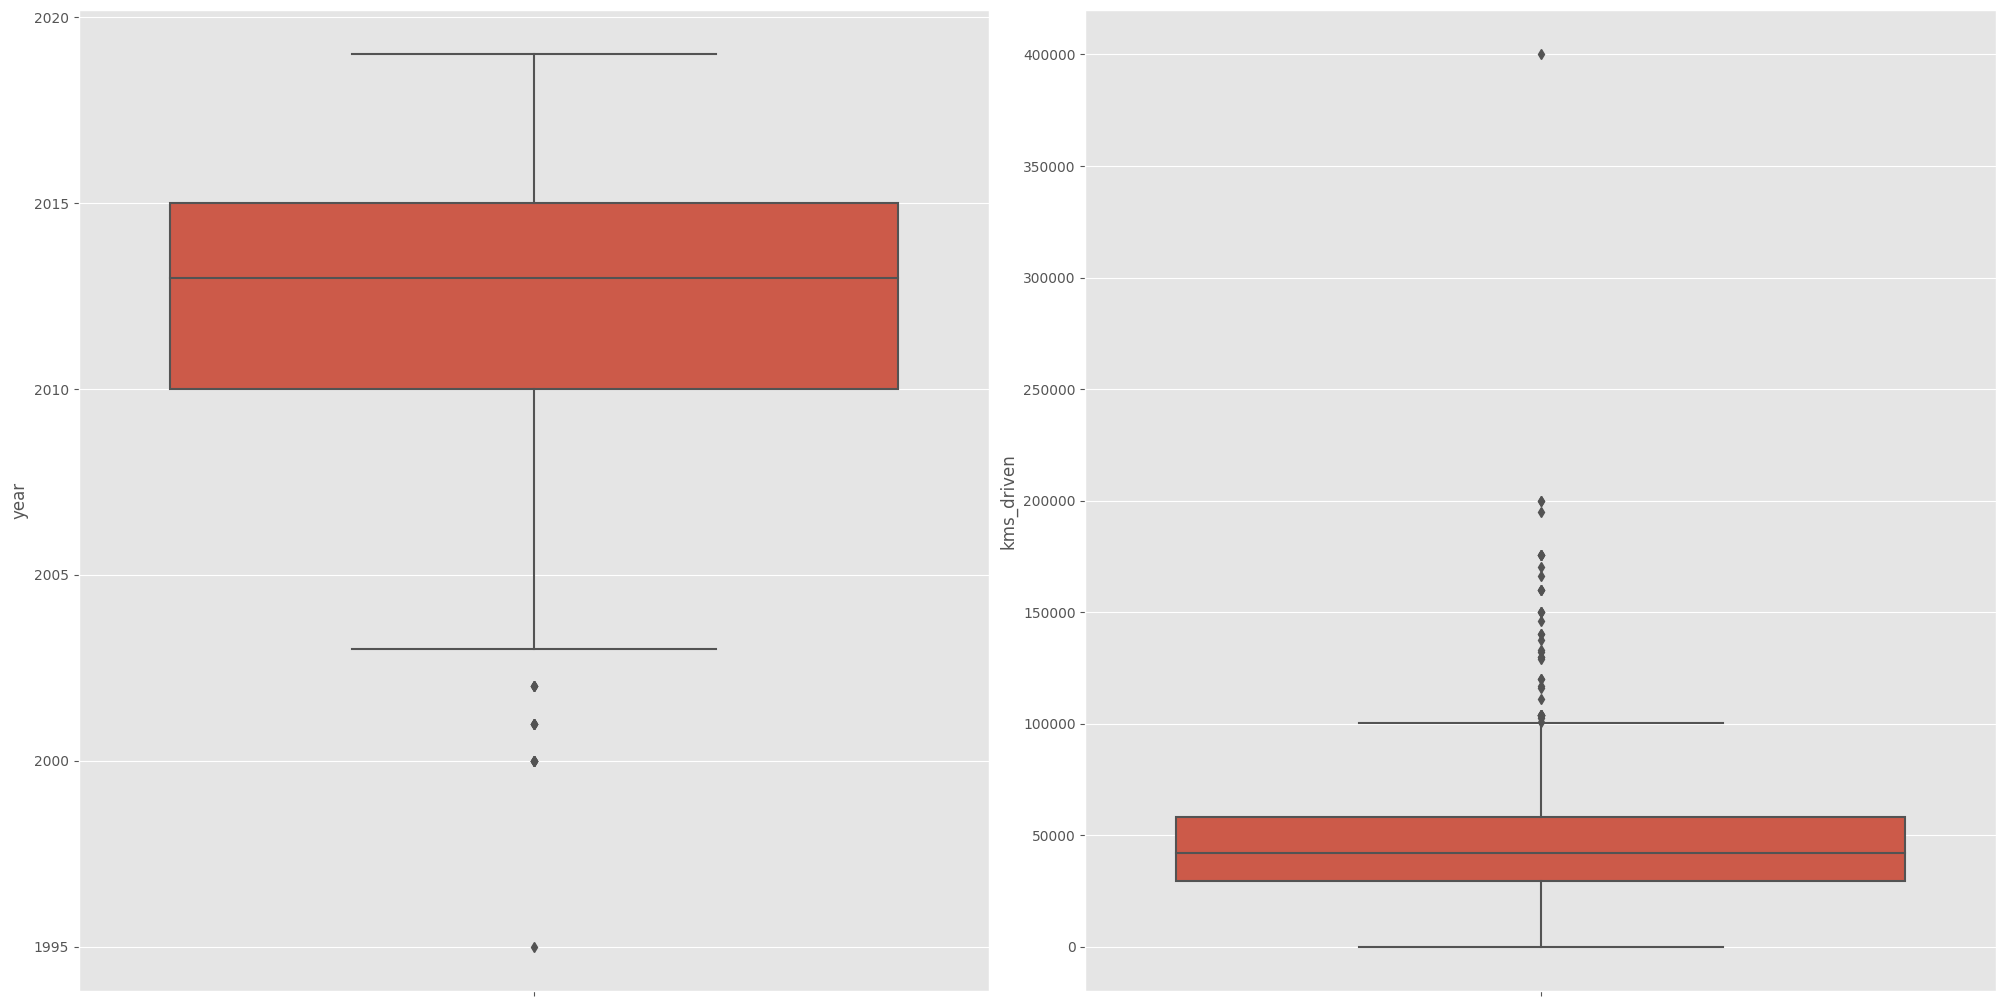

In [351]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()
num_col=['year','kms_driven']
for col in num_col:
    sns.boxplot(y=X[col], ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

**check the correlation between columns and target**

In [352]:
#75% of price <500000
data=data[data['Price']<600000]

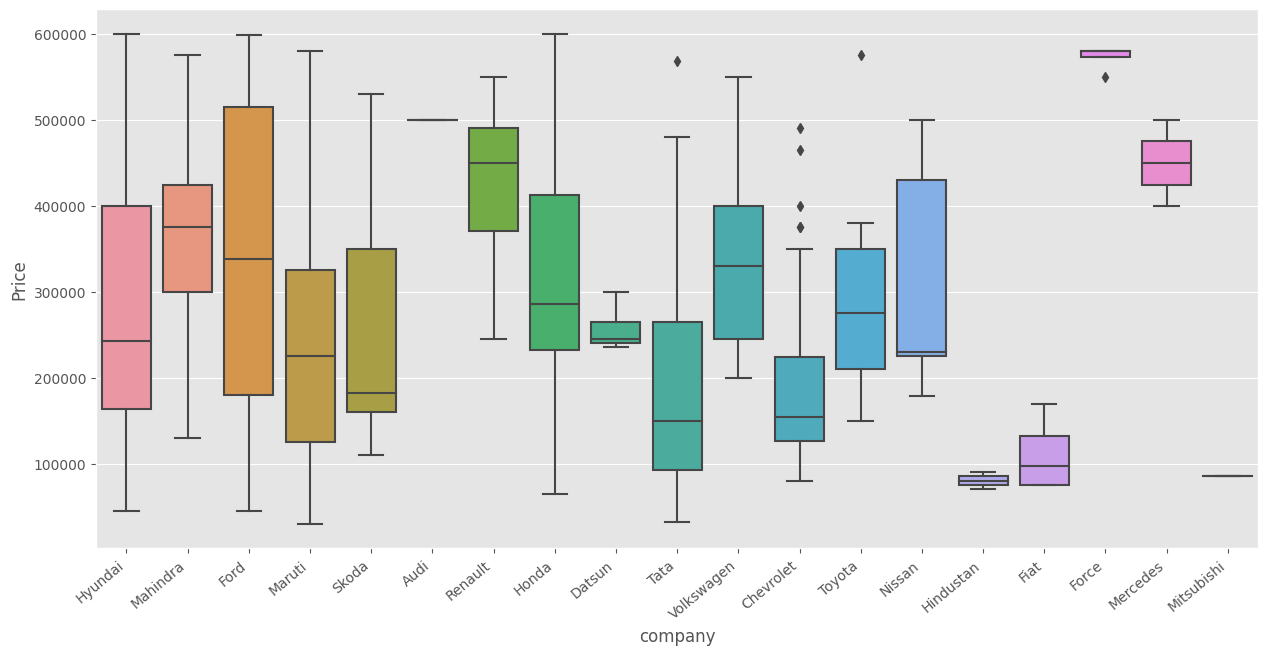

In [353]:
#relationship between company and Price
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

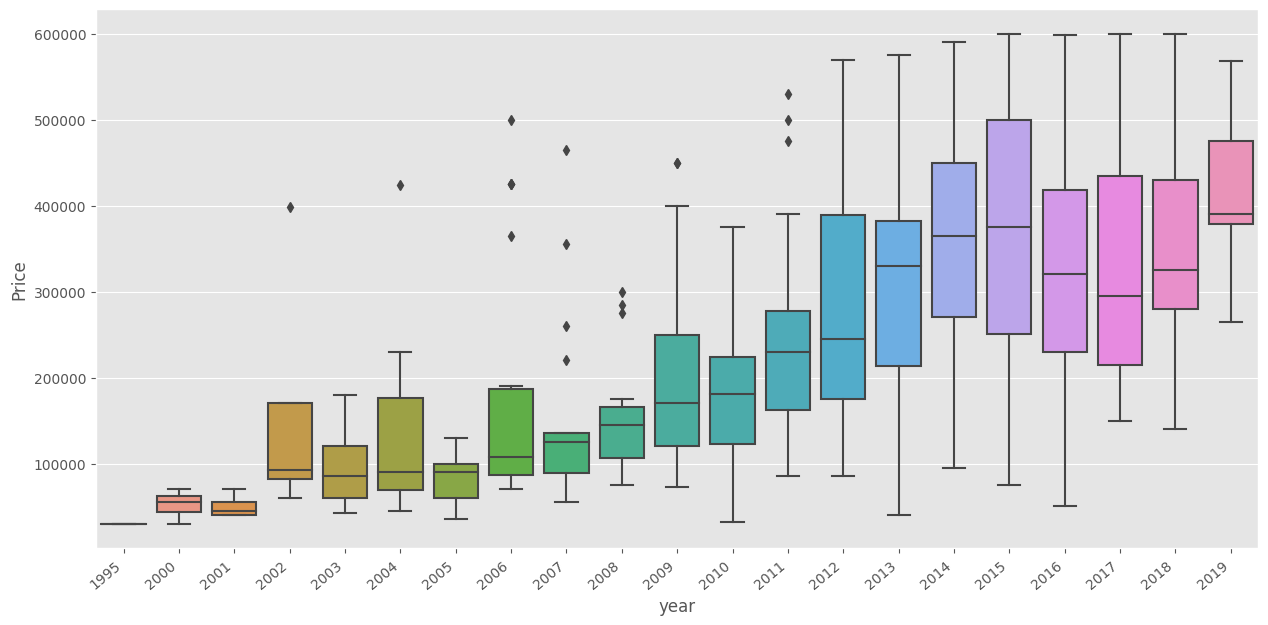

In [354]:
#relationship between year and Price
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

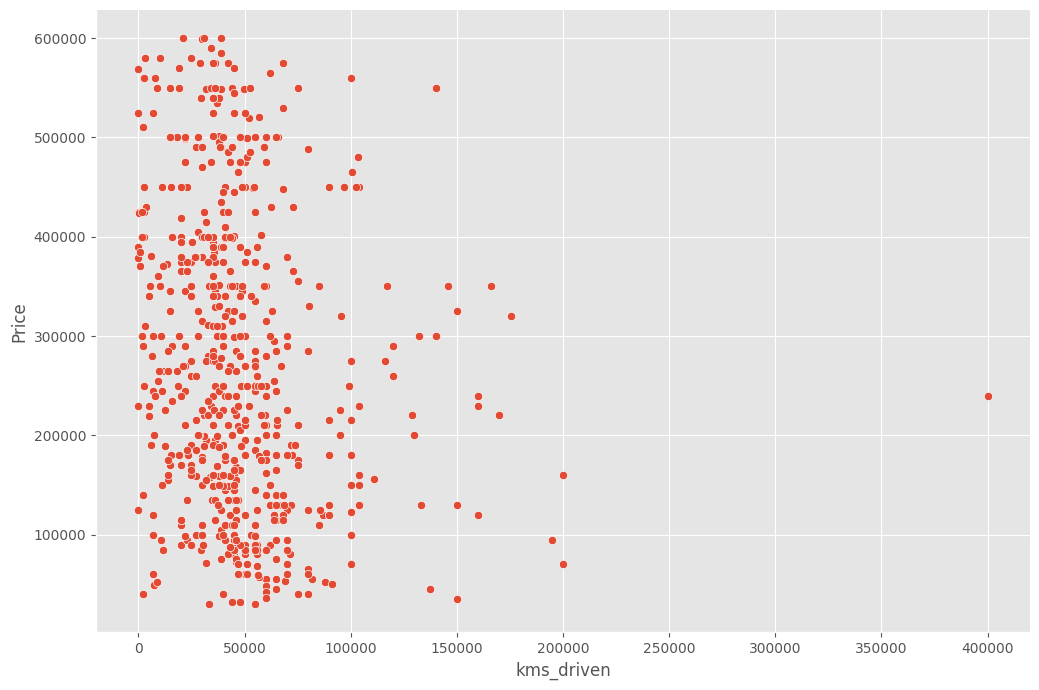

In [355]:
#Checking relationship of kms_driven with Price
sns.relplot(x='kms_driven',y='Price',data=data,height=7,aspect=1.5)

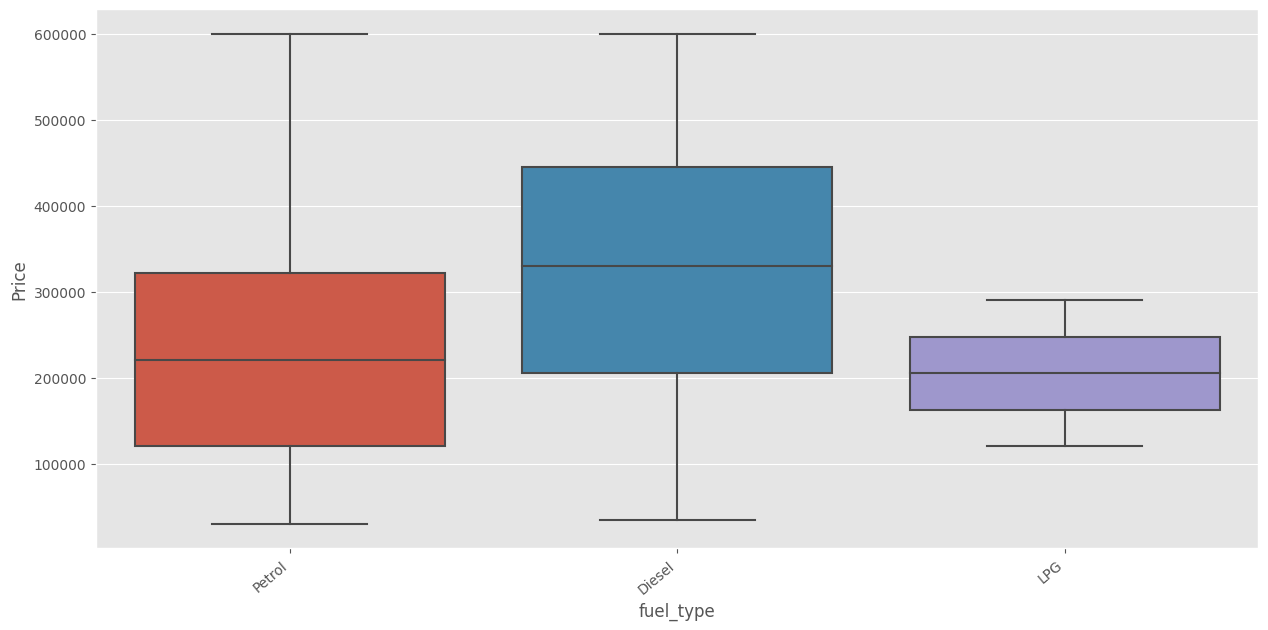

In [356]:
#Checking relationship of Fuel Type with Price
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='fuel_type',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**Split target from data**

In [357]:
X = data.drop('Price', axis=1)
y = data['Price']

#**splitting the data to train and test**

In [358]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Apply one hot encoding on name, company, Fuel Type**

In [359]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])


OneHotEncoder()

In [360]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#**Training Data**

In [361]:
Linear_regression=LinearRegression()

In [362]:
model=make_pipeline(column_trans,Linear_regression)

In [363]:
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q7', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS Diesel', 'Chevrolet Beat LS Petrol',
       'Chevrolet Beat LT Diesel', 'Chevrolet Beat LT Opt Diesel',
       'Chevrolet Beat LT Petrol', 'Chevrolet Beat PS Diesel',
       'Chevrolet Cru...
       'Volkswagen Vento Konekt Diesel Highline'], dtype=object),
                                                                            array(['Audi', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [364]:
y_pred=model.predict(X_test)
y_pred

array([423377.98354038,  36695.99796678,  49282.8388468 , 242414.97391429,
       314364.38918322, 349116.94859228, 338410.24248549, 209090.51142921,
       406218.79434678,  98432.26703238, 295116.31527483, 307873.75740748,
       284033.74541984, 328984.87177417, 275833.52771751, 374117.2498293 ,
       347477.84061857, 108672.04116797, 441115.2950107 , 189833.13652779,
       439580.07283118, 277888.31841166, 447008.11111073, 413561.32820296,
       313410.46196511,  53262.76266924, 234802.96635187, 490582.28151863,
       134764.00160803, 364808.23238686, 400465.71055662, 164097.39686686,
       266033.33243056, 369826.49559636, 453417.25939014,  14297.89397667,
       291461.27780115, 330588.16207808, 441115.2950107 , 184020.14502504,
       289929.46441575, 196224.46410503, 417751.51872218, 341630.78802791,
       585780.8636456 , 449949.71960504, 159310.17066562, 157453.70339308,
       129226.07320659, 374721.6859686 , 578119.61995938, 354536.96791005,
       196702.01736813, 3

**cheking r2_score**

In [365]:
r2_score(y_test,y_pred)

0.7036976775806307

**Finding the model with a random state of TrainTestSplit where the model was found best r2_score**

In [366]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [367]:
scores

[0.7670226185945178,
 0.8499031276739023,
 0.7783687665999279,
 0.7675204955152698,
 0.8417037464616508,
 0.7640427997475472,
 0.7939027487768573,
 0.8449780741335298,
 0.793991426291347,
 0.8661638466693313,
 0.7245415014390658,
 0.8313818737434748,
 0.8288408093959219,
 0.8006659924556929,
 0.7605873693361579,
 0.8130738935640403,
 0.7924473101845622,
 0.7858277096002027,
 0.7546529734980381,
 0.7818723893573011,
 0.7634788339663163,
 0.842859801860296,
 0.8334862705722246,
 0.8188304226362167,
 0.7701830707645442,
 0.8232235616018305,
 0.7786915788287013,
 0.8195050036767366,
 0.8054188339732097,
 0.8156791496060356,
 0.7912483314155173,
 0.8107207788934211,
 0.7616834409382642,
 0.8243273642324472,
 0.7307012292914323,
 0.7903831395285497,
 0.8065562071277985,
 0.8564380725500018,
 0.8009098462531995,
 0.8025300178601491,
 0.6805057478107979,
 0.8230335547669763,
 0.7917987046631003,
 0.8016137200393069,
 0.7276455129669641,
 0.7665810008934999,
 0.7254076466374901,
 0.804220005163

In [368]:
np.argmax(scores)

560

In [369]:
scores[np.argmax(scores)]

0.9111778246505553

In [370]:
model.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([387281.22127183])

#**Test the model**

In [371]:
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.7955257404988767